In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('TLKM.JK.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-28,3370.0,3460.0,3280.0,3430.0,3150.129150,178138100
1,2020-12-29,3500.0,3530.0,3400.0,3420.0,3140.945068,184525500
2,2020-12-30,3420.0,3420.0,3310.0,3310.0,3039.920410,150844500
3,2021-01-04,3320.0,3500.0,3310.0,3490.0,3205.233154,165339800
4,2021-01-05,3480.0,3480.0,3420.0,3470.0,3186.865234,157800700


In [5]:
data.shape

(493, 7)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,493.0,3.877667e+03,4.885536e+02,3.030000e+03,3.400000e+03,3.980000e+03,4300.0,4850.0
High,493.0,3.921156e+03,4.912326e+02,3.060000e+03,3.430000e+03,4.040000e+03,4350.0,4850.0
Low,493.0,3.832211e+03,4.826171e+02,3.000000e+03,3.360000e+03,3.930000e+03,4250.0,4720.0
Close,493.0,3.877363e+03,4.882772e+02,3.010000e+03,3.390000e+03,3.990000e+03,4300.0,4770.0
Adj Close,493.0,3.750470e+03,5.463914e+02,2.856240e+03,3.196049e+03,3.926386e+03,4210.0,4750.0
Volume,493.0,1.141068e+08,6.699120e+07,1.921670e+07,6.986630e+07,9.732050e+07,142204500.0,585687400.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       493 non-null    object 
 1   Open       493 non-null    float64
 2   High       493 non-null    float64
 3   Low        493 non-null    float64
 4   Close      493 non-null    float64
 5   Adj Close  493 non-null    float64
 6   Volume     493 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.1+ KB


In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data = data.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [11]:
data.head()

,Date,Close
0,2020-12-28,3430.0
1,2020-12-29,3420.0
2,2020-12-30,3310.0
3,2021-01-04,3490.0
4,2021-01-05,3470.0


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

In [13]:
data.index

DatetimeIndex(['2020-12-28', '2020-12-29', '2020-12-30', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12',
               ...
               '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19',
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-26', '2022-12-27'],
              dtype='datetime64[ns]', name='Date', length=493, freq=None)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 2020-12-28 to 2022-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   493 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [15]:
data.head()

,Close
Date,
2020-12-28,3430.0
2020-12-29,3420.0
2020-12-30,3310.0
2021-01-04,3490.0
2021-01-05,3470.0


### For Time Series

In [16]:
ts = data['Close']
ts.head(10)

Date
2020-12-28    3430.0
2020-12-29    3420.0
2020-12-30    3310.0
2021-01-04    3490.0
2021-01-05    3470.0
2021-01-06    3370.0
2021-01-07    3390.0
2021-01-08    3570.0
2021-01-11    3600.0
2021-01-12    3510.0
Name: Close, dtype: float64

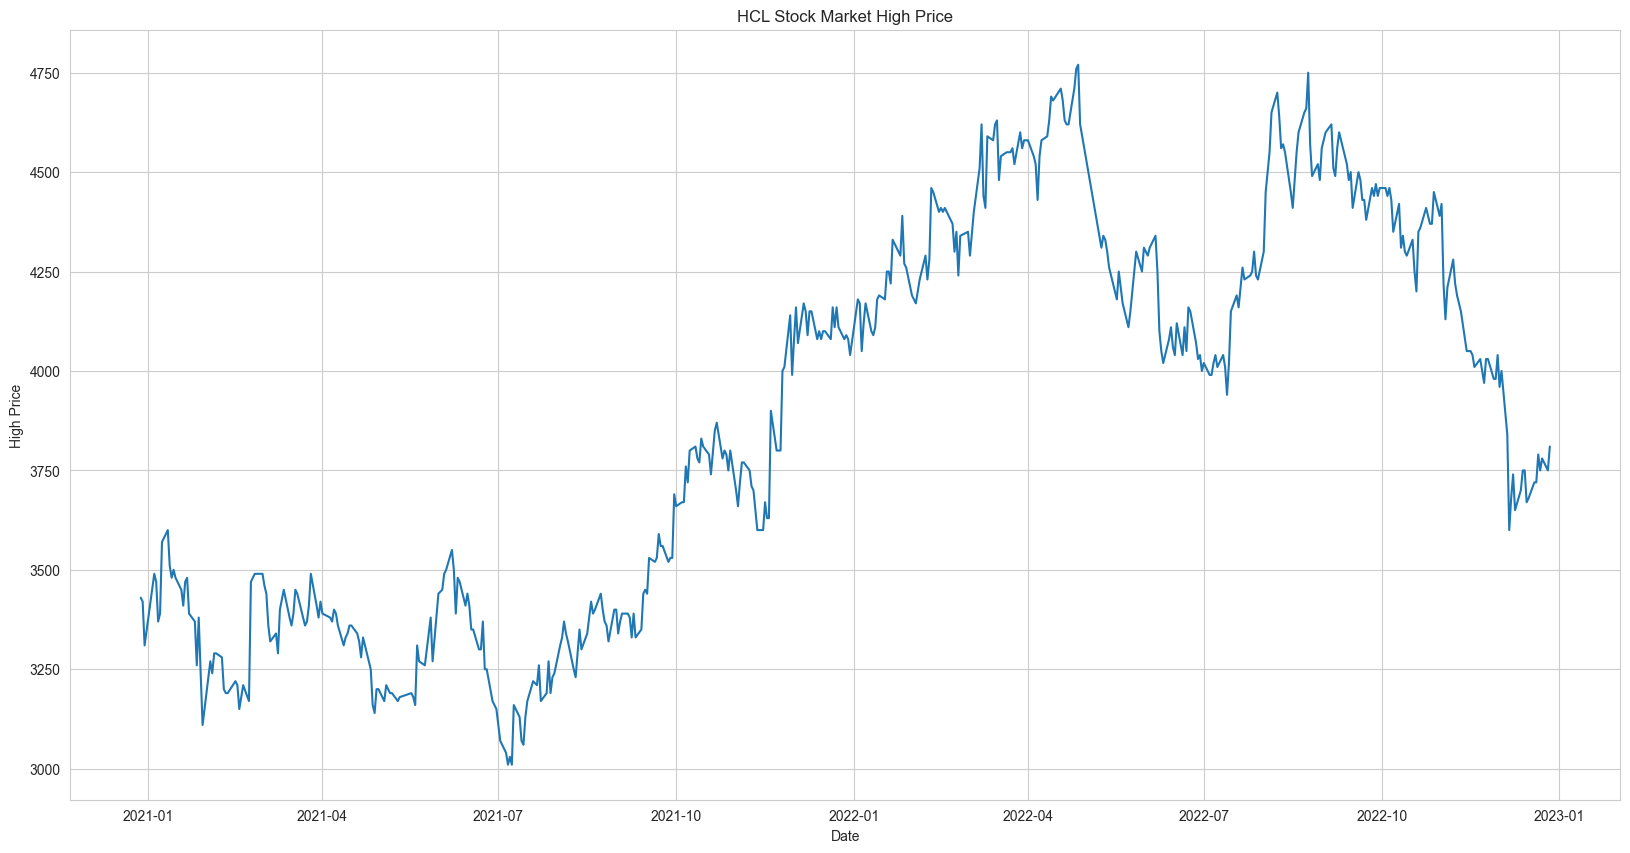

In [18]:
plt.figure(figsize=(20,10))

sns.set_style('whitegrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('HCL Stock Market High Price')

plt.plot(data['Close'])